In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path

import motorlab as ml
import yaml

In [3]:
os.chdir(Path().resolve().parent)

In [ ]:
def get_config(experiment="gbyk"):
    if experiment == "gbyk":
        sessions = [
            "bex_20230621_spikes_sorted_SES",  # before
            "bex_20230624_spikes_sorted_SES",  # before
            "bex_20230629_spikes_sorted_SES",  # before
            "bex_20230630_spikes_sorted_SES",  # before
            "bex_20230701_spikes_sorted_SES",  # before
            "bex_20230708_spikes_sorted_SES",  # while
            "ken_20230614_spikes_sorted_SES",  # while and before
            "ken_20230618_spikes_sorted_SES",  # before
            "ken_20230622_spikes_sorted_SES",  # while, before and free
            "ken_20230629_spikes_sorted_SES",  # while, before and free
            "ken_20230630_spikes_sorted_SES",  # while
            "ken_20230701_spikes_sorted_SES",  # before
            "ken_20230703_spikes_sorted_SES",  # while
        ]
    else:
        sessions = [
            "bex_20230221",
            "bex_20230222",
            "bex_20230223",
            "bex_20230224",
            "bex_20230225",
            "bex_20230226",
            "jon_20230125",
            "jon_20230126",
            "jon_20230127",
            "jon_20230130",
            "jon_20230131",
            "jon_20230202",
            "jon_20230203",
            "luk_20230126",
            "luk_20230127",
            "luk_20230130",
            "luk_20230131",
            "luk_20230202",
            "luk_20230203",
        ]

    config = {
        "DATA_DIR": f"data/{experiment}",
        "CHECKPOINT_DIR": "checkpoint/pose_to_position",
        "CONFIG_DIR": "config/pose_to_position",
        "save": True,
        "experiment": experiment,
        "seed": 0,
        "homing": True,
        "filter": False,
        "in_modalities": "poses",
        "out_modalities": "position",
        "architecture": "gru",
        "sessions": sessions,
        "body_repr": "egocentric",
        "loss_fn": "crossentropy",
        "metric": "accuracy",
        "model": {
            "embedding_dim": 256,
            "hidden_dim": 256,
            "n_layers": 1,
            "readout": "linear",
            "n_classes": 15,
        },
        "train": {"n_epochs": 200, "lr": 3e-3},
        "track": {"metrics": True, "wandb": False, "checkpoint": True},
    }
    return config

In [5]:
ml.model.train(get_config())

uid: 20250624232437
GRUModel(
  (embedding): LinearEmbedding(
    (linear): ModuleDict(
      (bex_20230621_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230624_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230629_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230630_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230701_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (bex_20230708_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230614_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230618_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230622_spikes_sorted_SES): Linear(in_features=63, out_features=256, bias=True)
      (ken_20230629_spikes_sorted_SES): Linear(in_features=63, out_features=256, bia

In [42]:
run = 20250624174842  # filter: false, homing: false
# run = 20250624232437  # filter: false, homing: true
# run =  # filter: true,  homing: false
# run =  # filter: true,  homing: true

In [43]:
CONFIG_DIR = Path(get_config()["CONFIG_DIR"])
CONFIG_PATH = CONFIG_DIR / f"{run}.yaml"

with open(CONFIG_PATH, "r") as f:
    config = yaml.safe_load(f)

# config["load_epoch"] = 20
# config["homing"] = False

eval_metrics, eval_gts, eval_preds = ml.model.evaluate(config)

for session in eval_preds:
    eval_gts[session] = eval_gts[session].reshape(-1)
    eval_preds[session] = eval_preds[session].argmax(axis=-1).reshape(-1)

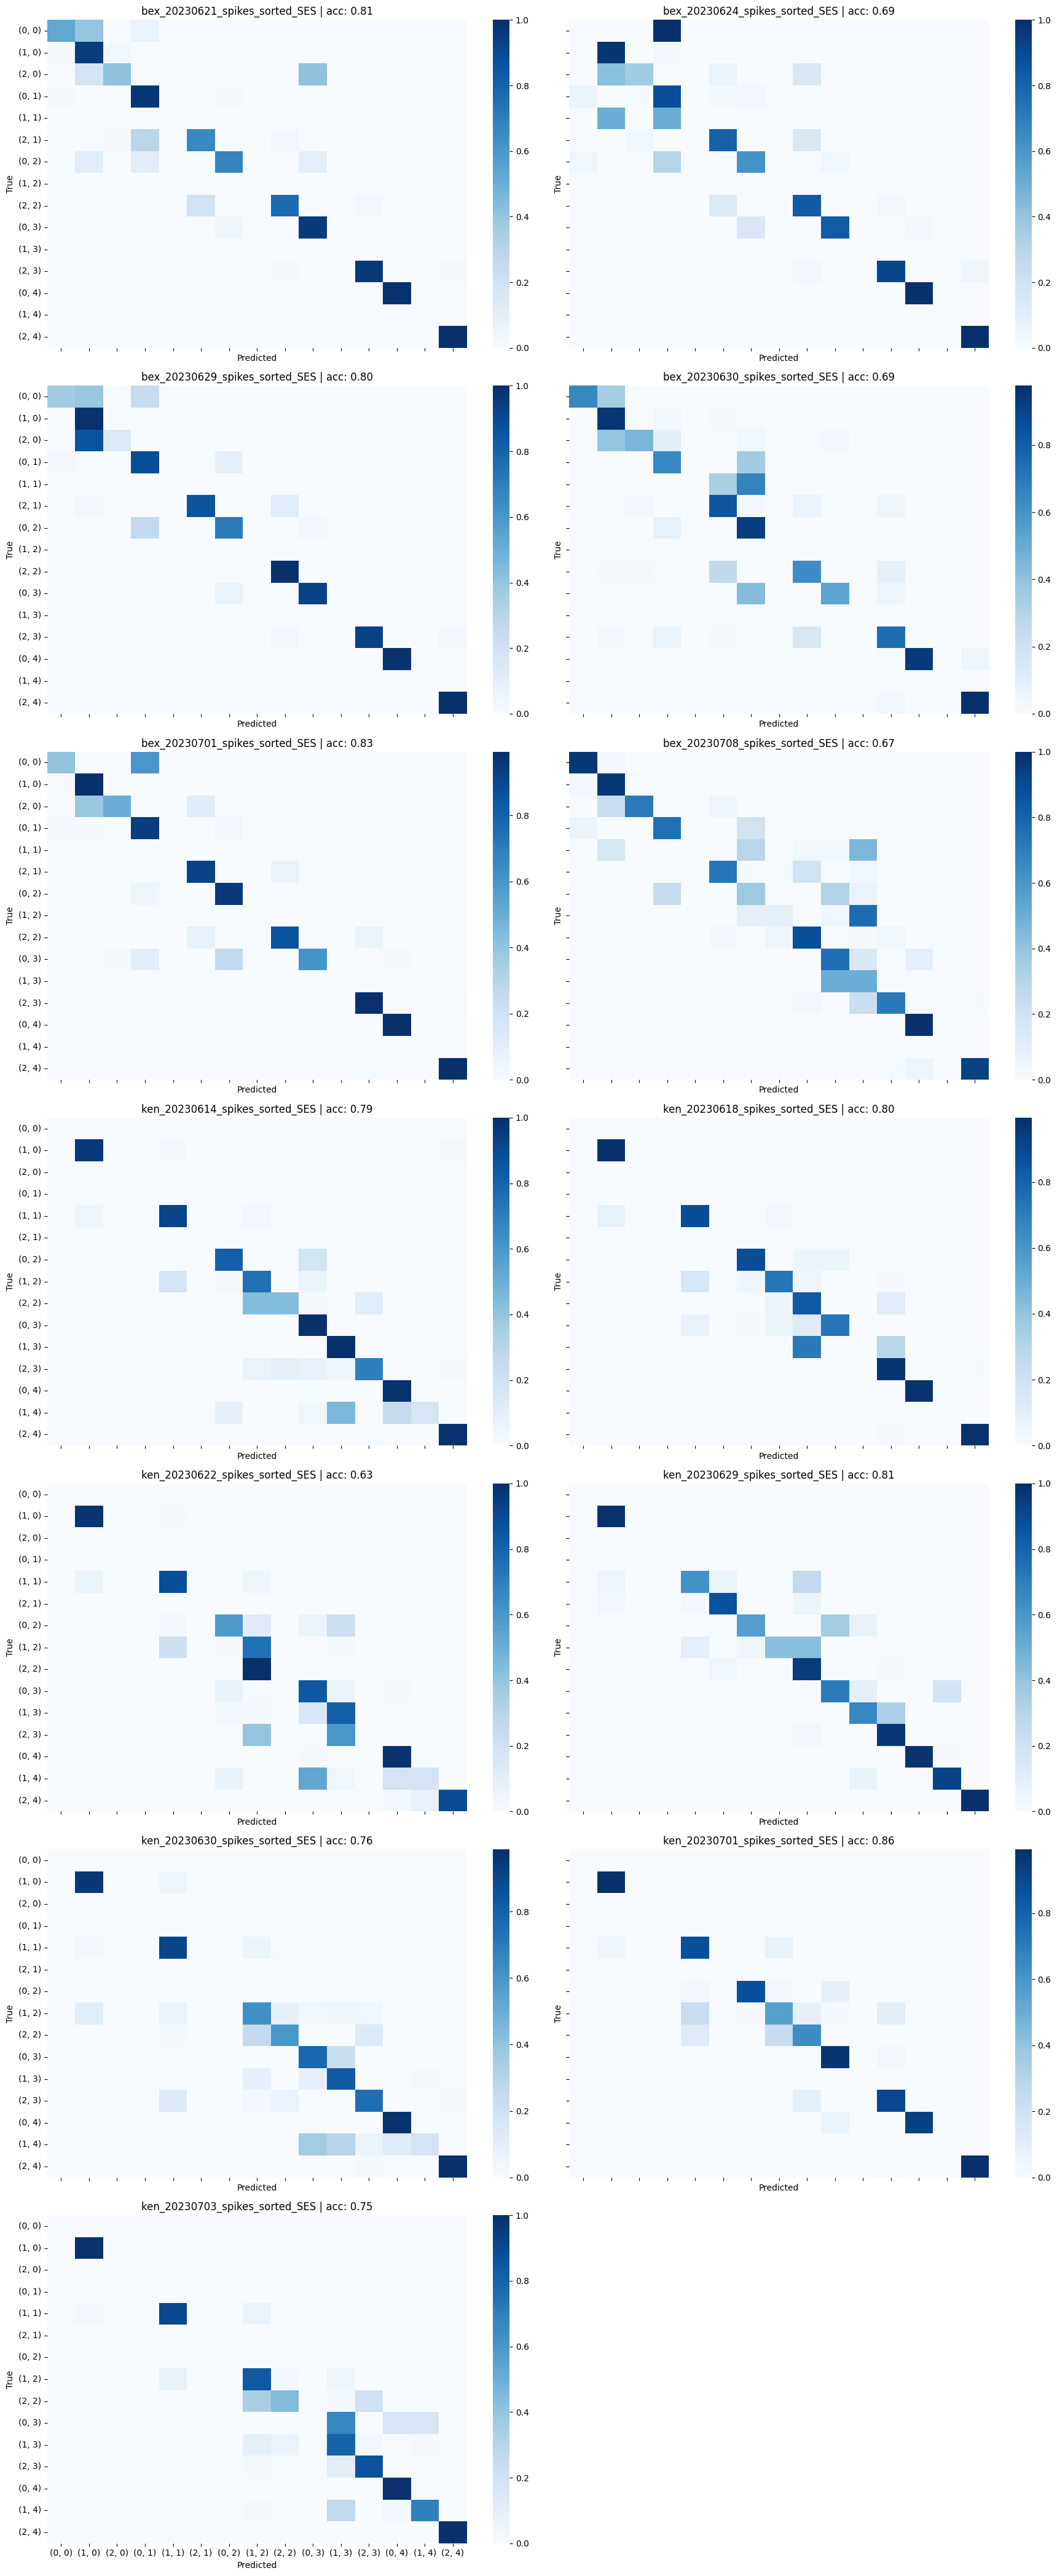

<Figure size 640x480 with 0 Axes>

In [46]:
ml.plot.confusion_matrix(
    eval_gts,
    eval_preds,
    # group="x",
    include_sitting=True,
    save_path="plots/pose_to_position/confusion_matrix_nofilter_nohoming.svg",
)

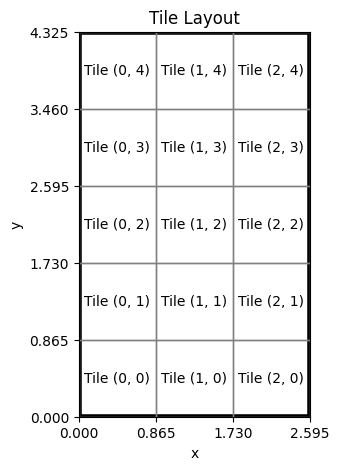

In [258]:
ml.room.plot(save_path="plots/pose_to_position/room.svg")